# Predicting heart disease using Machine learning 

This notebook looks into various python-based and data science libraries in an attemp to build a machine learning model capable 
of predicting weather or not someone has heart disease or not based on their medical attributes.

We'er going to take the following approach
* Problem Definition
* Data 
* evaluation
* features
* modelling
* experimentation


## 1.PROBLEM DEFINITION
In a statement,
> Given clinic parameters about a patient,weather or not they have heart disease


## 2.Data
UCI machine learning repo.
https://archive.ics.uci.edu/ml/datasets/Heart+Disease


## 3.Evaluation
> If we can reach 95% accuarcy at predicting if a person have or not have heart disease during the proof of persuit,
we'll persue the project


## 4.Features
thiswhere you'll get different information about each of the features in data.

**Data Dictionary**





## Preparing the tools

In [1]:
# import all the tools we needed

# regular EDA (exploratory data analysis) and plotting libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve



In [2]:
df=pd.read_csv("heart disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

##data exploration (EDA)
the goal here is to find about the data and become a subject matter expert in dataset you working with.

1. what question(s) you are trying to solve?
2. what kind of data we have and how we treat different types?
3. what's missing with the data and how can we dealwith it?
4. where are the outliers and why you should care about them?
5. how can you add,change or remove features out of the data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# let's find out how many class there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

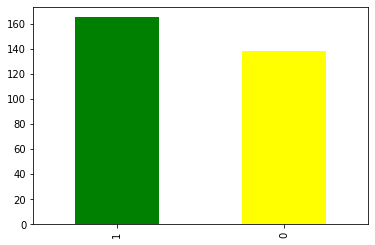

In [7]:
df["target"].value_counts().plot(kind="bar",color=["green","yellow"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease according to the frequency of Sex attribute

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


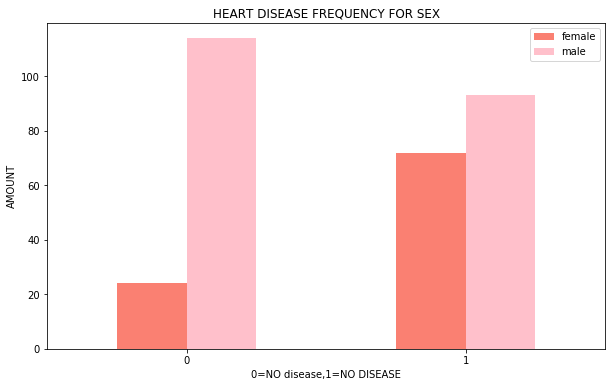

In [13]:
# create a plto of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                 figsize=(10,6),
                                 color=("salmon","pink"));

plt.title("HEART DISEASE FREQUENCY FOR SEX")
plt.xlabel("0=NO disease,1=NO DISEASE")
plt.ylabel("AMOUNT")
plt.legend(["female","male"])
plt.xticks(rotation=0);

### Age vs max heart rate for Heart Disease

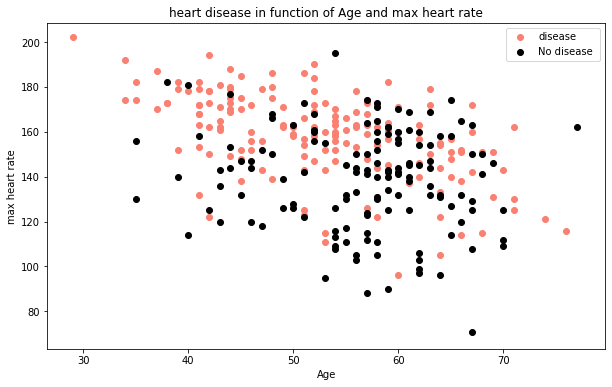

In [14]:
# craete another figure
plt.figure(figsize=(10,6))

# scatter with positive values
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

# scatter with negative values
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="black");

# Add some helpful info
plt.title("heart disease in function of Age and max heart rate")
plt.xlabel("Age")
plt.ylabel("max heart rate")
plt.legend(["disease","No disease "]);

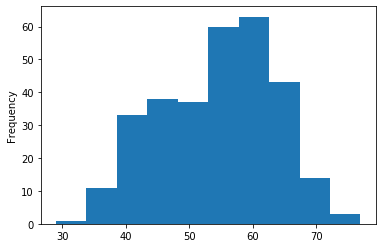

In [15]:
# check the ditribution of age column with histogram
df.age.plot.hist();

### heart disease frequecy per chest pain type

* 0-Typical angina-chest pain related decrese blossd sugar supply to the heart
* 1-Atypical angina-chest pain related to heart
* 2-Non anginal pain-typicallt esophagys spasms
* 3-Asymptomatic-chest pain not showing sign of disease

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


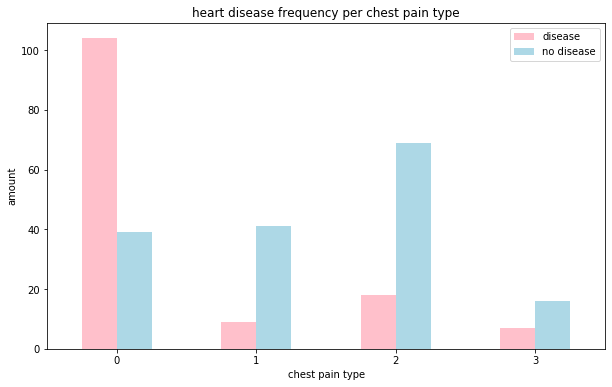

In [17]:
## make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                 color=("pink","lightblue"));

## add some communications 
plt.title("heart disease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["disease","no disease"])
plt.xticks(rotation=0);


**CORRELATION METRICS-The correlation matrix can be used to estimate**
**the linear historical relationship between the returns of multiple assets.**

In [18]:
## make correlation metrics
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


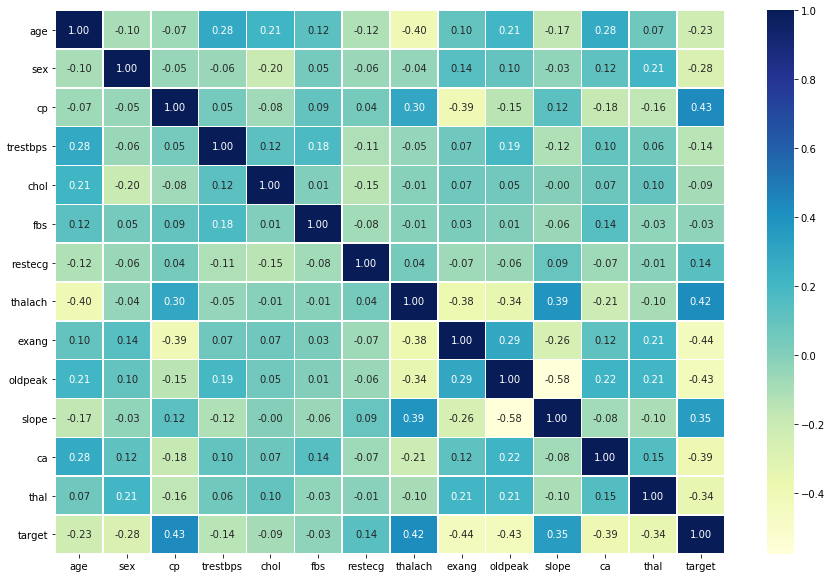

In [19]:
# let's make our correlation metrix more beautiful
corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu");

**things about correlation**
**a higher positive value means a higher potential positive correlation**
**a negative correlation is something in which one value increses as the other decreases**
 

## 5.Modelling

In [20]:
# split into x and y
x=df.drop("target",axis=1)
y=df["target"]

In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
# split our data into train and test set
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now are data is split into training and test split,it's time to build a machine learning model

we'll train it (finding new patterns) on the training set

we'll test it (using the patterns) on the test set

we are going to work on 2 machine learning model

1. Logistic regression

2. k-Nearest neighbours

3. Random Forest Classifier

In [24]:
# put models into the dictionary
models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}

#create a function to fit and score the model
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    fits and evaluate the given machine learning models.
    models:a dict of different scikit-learn machine learning models.
    x_train:traing data(no labels)
    x_test:testing data (no labels)
    y_traing:traing labels
    y_test:testing labels
    """
    #set the random seed
    np.random.seed(42)
    # make a dictionary to keep models score
    model_scores={}
    # loop throgh  models
    for name,model in models.items():
        # fit the model to the data
        model.fit(x_train,y_train)
        # evaluate the model and append it's score to the model score
        model_scores[name]=model.score(x_test,y_test)
    return model_scores    
    
    
 

In [25]:
model_scores=fit_and_score(models=models,
                          x_train=x_train,
                          x_test=x_test,
                          y_train=y_train,
                          y_test=y_test)

model_scores

C:\Users\BP Soni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

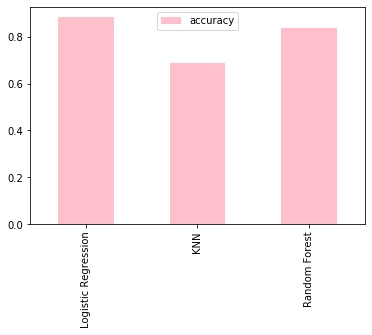

In [26]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar(color=["pink"]);


Now we have got our first baseline model and we know that the model's first predictions aren't always we should based our next steps off.what should do?

let's look at the following-
* Hyperparametr tunning #thees two are the aprt of any machine learning proct or model you are working on
* Feature importance 
* Confusion matrix # these all are dependent on classification or regressin u are using
* Cross-validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area under the curve (AUC)


### HYPERPARAMETER TUNNING

In [27]:
## let's tune in KNN
train_scores= []
test_scores =[]

# create a list of different values for n_neighbors
neighbors=range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algo
    knn.fit(x_train,y_train)
    
    # update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    # update the test scores list
    test_scores.append(knn.score(x_test,y_test))
    

In [28]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [29]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum knn score of the data:75.41%


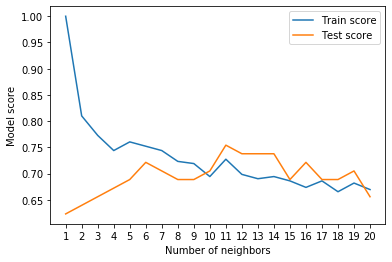

In [30]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum knn score of the data:{max(test_scores)*100:.2f}%");

## HYPERPARAMETR TUNNING WITH RANDAMIZEDSEARCHCV

we are going to tune
* LogisticRegressionCV
* RandomForestClassifier()
... using RandomizedSearchCV

In [31]:
log_reg_grid={"C":np. logspace(-4,4,20),
             "solver":["liblinear"]}

In [32]:
np.logspace(-4.4,20)

array([3.98107171e-05, 1.25302341e-04, 3.94383164e-04, 1.24130227e-03,
       3.90693994e-03, 1.22969078e-02, 3.87039333e-02, 1.21818791e-01,
       3.83418858e-01, 1.20679264e+00, 3.79832251e+00, 1.19550396e+01,
       3.76279193e+01, 1.18432088e+02, 3.72759372e+02, 1.17324241e+03,
       3.69272476e+03, 1.16226758e+04, 3.65818198e+04, 1.15139540e+05,
       3.62396232e+05, 1.14062492e+06, 3.59006276e+06, 1.12995520e+07,
       3.55648031e+07, 1.11938528e+08, 3.52321199e+08, 1.10891424e+09,
       3.49025488e+09, 1.09854114e+10, 3.45760606e+10, 1.08826508e+11,
       3.42526264e+11, 1.07808514e+12, 3.39322177e+12, 1.06800043e+13,
       3.36148062e+13, 1.05801006e+14, 3.33003639e+14, 1.04811313e+15,
       3.29888630e+15, 1.03830879e+16, 3.26802759e+16, 1.02859616e+17,
       3.23745754e+17, 1.01897438e+18, 3.20717346e+18, 1.00944261e+19,
       3.17717266e+19, 1.00000000e+20])

In [33]:
# create hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

**Now we hav got our hyperparameter grid setup for each of our models,let's tune yhem using RandomizedSearchCV**

In [34]:
# tune logistic regression

np.random.seed(42)

# setup random hyperparameter search for logistic regression
# rs for random search
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

# fit hyperparameter Random search model for logistic regression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [36]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we have tunned logistic regression and now we do the same for random forest classifier() 

In [37]:
# setup random seed
np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier()
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

# fit the random hyperparameter search for the RandomForestClassifer()
rs_rf.fit(x_train,y_train)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   58.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [38]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [39]:
rs_rf.score(x_test,y_test)

0.8688524590163934

* Hand
* RandomizedSearch
* GridSearch

## HYPERPARAMETER TUNNING WITH GRIDSEARCHCV

SINCE our logistiv regression model provides best score so far.we'll try and improve them again by GridSearchCV

In [40]:
# different hyperparameter for our LogistcRegression model
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

# setup grid hyperparameter search for regression mdel
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
# you have  noticed we dont have used  any n ter command here bcz grid search sees every thing in model

# fit the grid hyperparameter search model gor logistic regression 
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [41]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

# evaluating our tunned machine learnong classifier,beyond accrucy
* ROC and AUC curve
* confusion matrix
* classification report
* precision 
* recall
* F1 score

... and it would be great if cross validation is used where possible

To make comparisons and evaluate our trained model first we need to make predictions

In [43]:
# make prediction with tunned model
y_preds=gs_log_reg.predict(x_test)



In [44]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [45]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

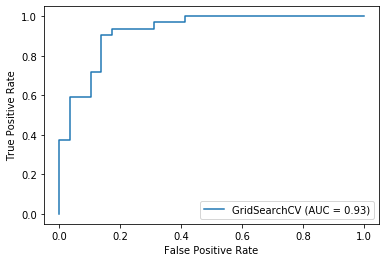

In [46]:
# plot ROC  curve and calculate AUC curve
plot_roc_curve(gs_log_reg,x_test,y_test);

In [47]:
# confusipn matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [48]:
sns


<module 'seaborn' from 'C:\\Users\\BP Soni\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

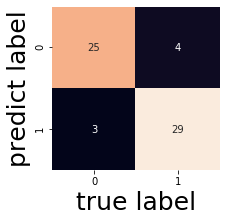

In [49]:
import seaborn as sns



def plot_conf_mat(y_test,y_preds):
    """
    plots a nice looking confusion matri using seaborn heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("true label",fontsize=25)
    plt.ylabel("predict label",fontsize=25)
    
plot_conf_mat(y_test,y_preds)    

now we have got ROC curve,an AUC metric and a confusion metric. let's get aclassification report as wll as cross validation precision,recall,f1 score

In [50]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation matrix using cross-validation

we are going to calculate accracy,precision,recall,f1 score of our model by cross validation and to do so we use 'cross_val_score'

In [51]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [52]:
# create  a new classifier using best parameters
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [53]:
# cross_validated accuracy
cv_acc=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="accuracy")

In [54]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [55]:
# cross_validated precision
cv_precision=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="precision")


In [56]:
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [57]:
# cross_validated recall
cv_recall =cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="recall") 


In [58]:
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [59]:
# cross_validated f1 score
cv_f1=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="f1")

In [60]:
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

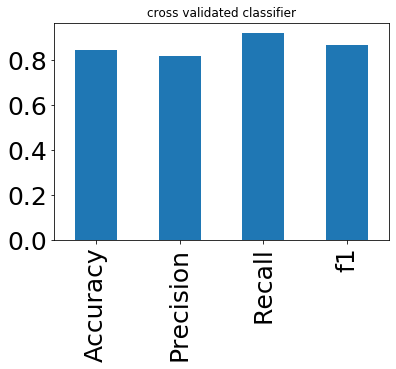

In [61]:
# visualize cross validates matrix
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                       "Precision":cv_precision,
                       "Recall":cv_recall,
                       "f1":cv_f1},index=[0])

cv_metrics.T.plot.bar(title="cross validated classifier",legend=False,fontsize=25);

### feature importance

feature impotance is another as askinf "which feature has given more in the outcome of the model and how did they contribute?"


#### finding feature importance is different for each machine learning model.one way to find out "(model name) feature importance"

#### let's find feature importance of our logistic reggression model

In [62]:
# fit an instance of LogisticRegression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [63]:
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [64]:
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
#check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [66]:
# match coef's of feature to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

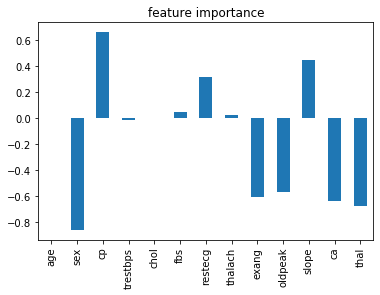

In [67]:
# visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="feature importance",legend=False);

In [68]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [69]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# 6. experimantation

In [70]:
if you have not hit your evaluation metric yet... yotself...

* could you collect more data?
* could you try better model like catboost or XGboost?
* could we improve the current model (beyond what we have done so far)?
* if your model is good enough (you have hit the evaluation metric) how would you export it to share with any one?


SyntaxError: invalid syntax (<ipython-input-70-efafe9b71d6e>, line 1)